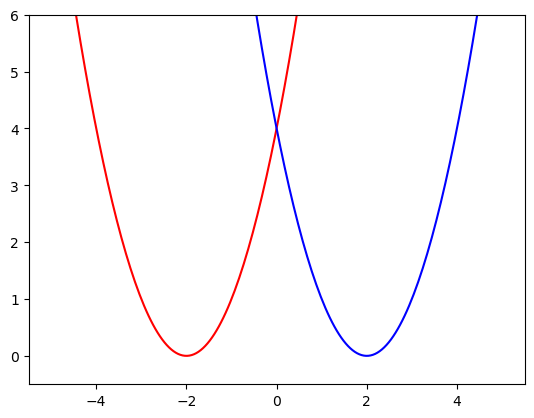

In [1]:
%matplotlib inline
from math import *
import numpy as np
import random
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
np.set_printoptions(precision=3)
def u0(x):
    return (x+2)**2
def u1(x):
    return (x-2)**2
x=np.linspace(-5,5,200)
y0=u0(x)
y1=u1(x)
plt.ylim(-.5, 6)
plt.plot(x,y0,'r',x,y1,'b')
plt.show()

In [11]:
def MCpropagator(x0,dx,N,dN,u):
    count = 0
    x = np.empty(N)
    xcurrent = x0
    while count <N:
        innercount = 0
        while innercount < dN:
            rnd = np.random.uniform(0.0,1.0)
            if rnd < 0.5:
                xtrial = xcurrent - dx
            else:
                xtrial = xcurrent + dx

            deltau = u(xtrial) - u(xcurrent)
            if deltau < 0.0:
                xcurrent = xtrial
            else:
                acceptanceratio = np.exp(-deltau)
                if acceptanceratio > np.random.uniform(0.0,1.0):
                    xcurrent = xtrial
                else:
                    xcurrent = xcurrent
            innercount = innercount + 1
        x[count]=xcurrent
        count = count + 1
    return x, count

Number of samples generated:   10000
The distribution of the samples looks like:


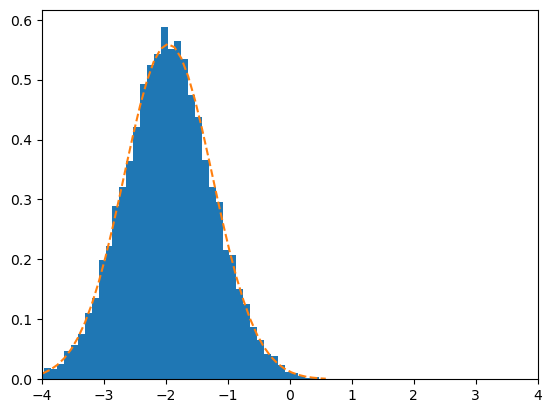

In [12]:
dx=0.01
N = 10000
dN = 1600
x0 = -1.5
x = np.empty(N)
x, count = MCpropagator(x0,dx,N,dN,u0)
print('Number of samples generated:%8d' %count)
print('The distribution of the samples looks like:')
prob, bins, patches = plt.hist(x, bins=50, density=True)
mean = np.mean(x)
variance = np.var(x)
sigma = np.sqrt(variance)
npdf = scipy.stats.norm.pdf(bins,mean,sigma)
plt.plot(bins, npdf, '--')
plt.xlim(-4,4)
plt.show()

In [13]:
##we calculate the free energy difference using defined tp function

def TP(x,u1,u0):
    edu = np.zeros(x.size)
    edu = np.exp(-(u1(x)-u0(x)))
    S = np.mean(edu)
    varS = np.var(edu)/x.size
    deltaA = -np.log(S)
    varA = varS/S**2
    return deltaA, varA

The distribution of delta U looks like:


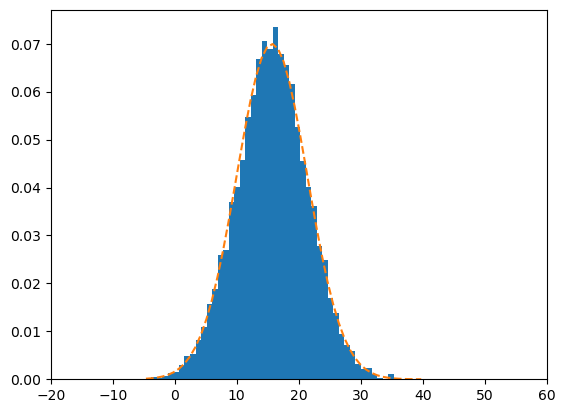

The free energy difference from a direct TP calculation is     3.35 +-  0.35


In [14]:
du=u1(x)-u0(x)
probdu, binsdu, patchesdu = plt.hist(du, bins=50, density=True)
meandu = np.mean(du)
variancedu = np.var(du)

sigmadu = np.sqrt(variancedu)
npdfdu = scipy.stats.norm.pdf(binsdu,meandu,sigmadu)
plt.plot(binsdu, npdfdu, '--')
print('The distribution of delta U looks like:')
plt.xlim(-20,60)
plt.show()

deltaA_direct, varA_direct = TP(x,u1,u0)
print('The free energy difference from a direct TP calculation is %8.2f +- %5.2f' % (deltaA_direct, sqrt(varA_direct)))